In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [47]:
df = pd.read_csv('bank-full.csv', sep=';')

In [48]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [49]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [50]:
df.describe(include=object)

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

# EDA

In [51]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

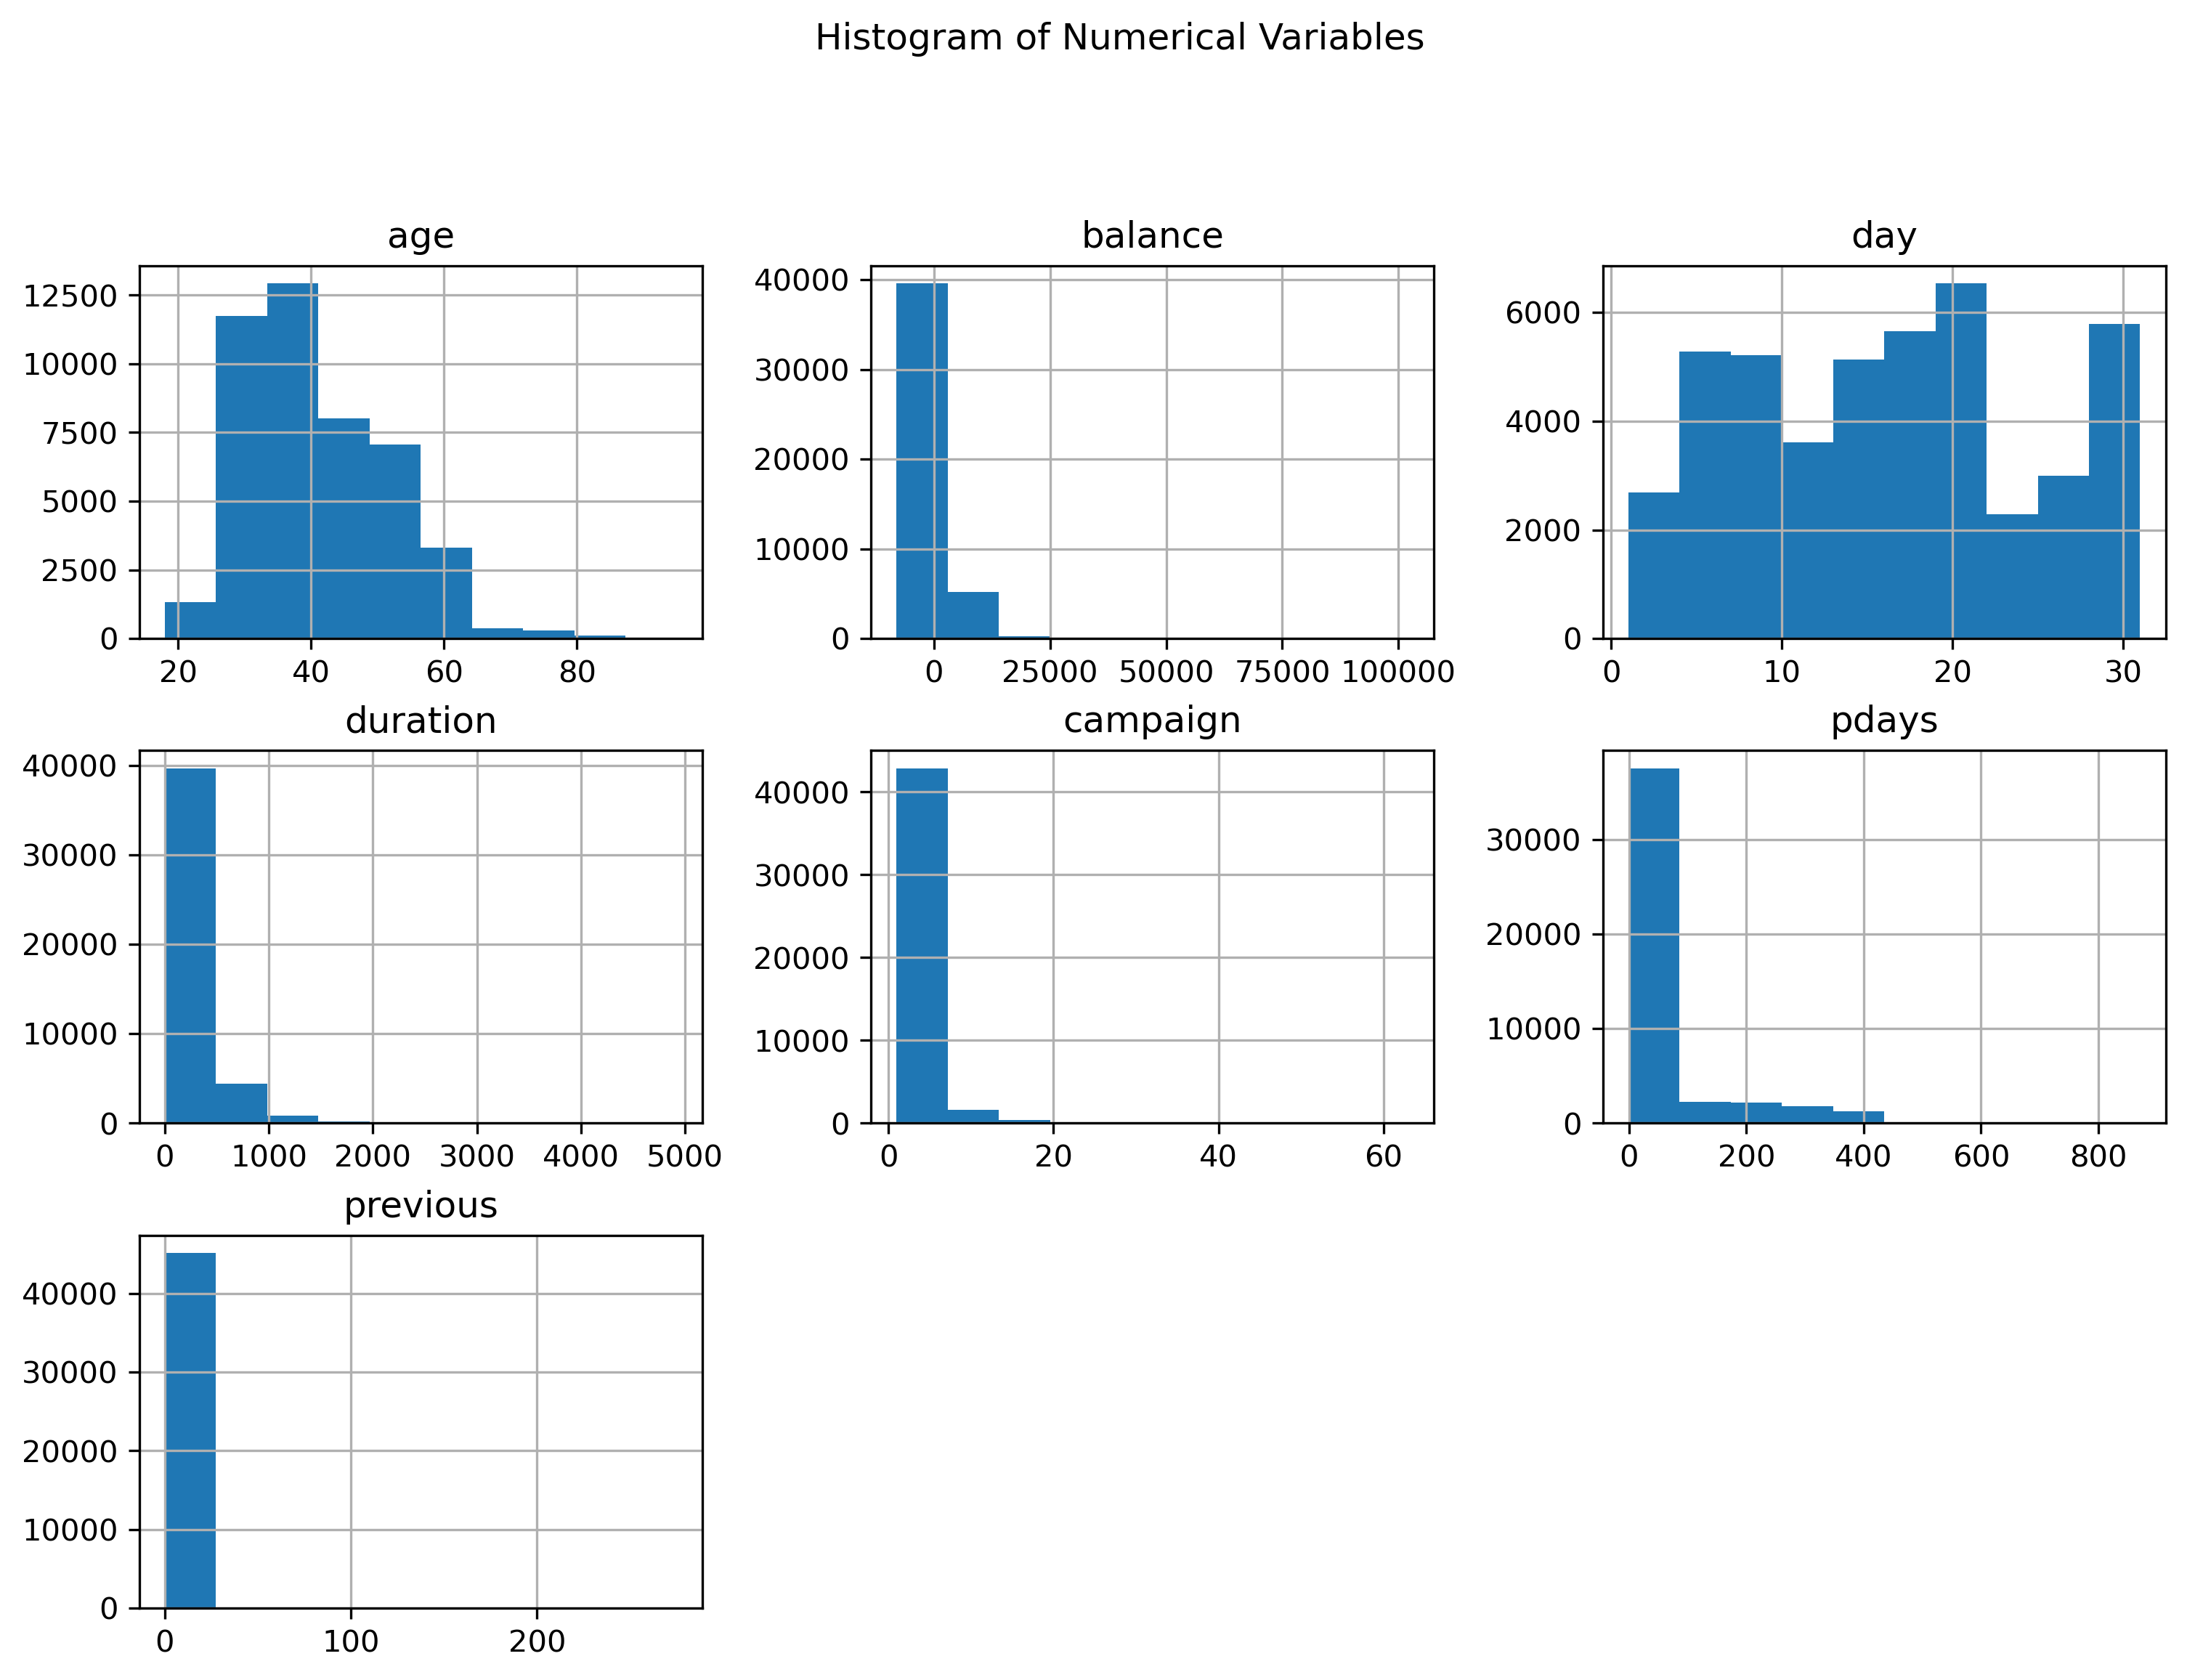

In [52]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df[numerical_features].hist(figsize=(12, 8))
plt.suptitle('Histogram of Numerical Variables', y=1.02)
plt.show()

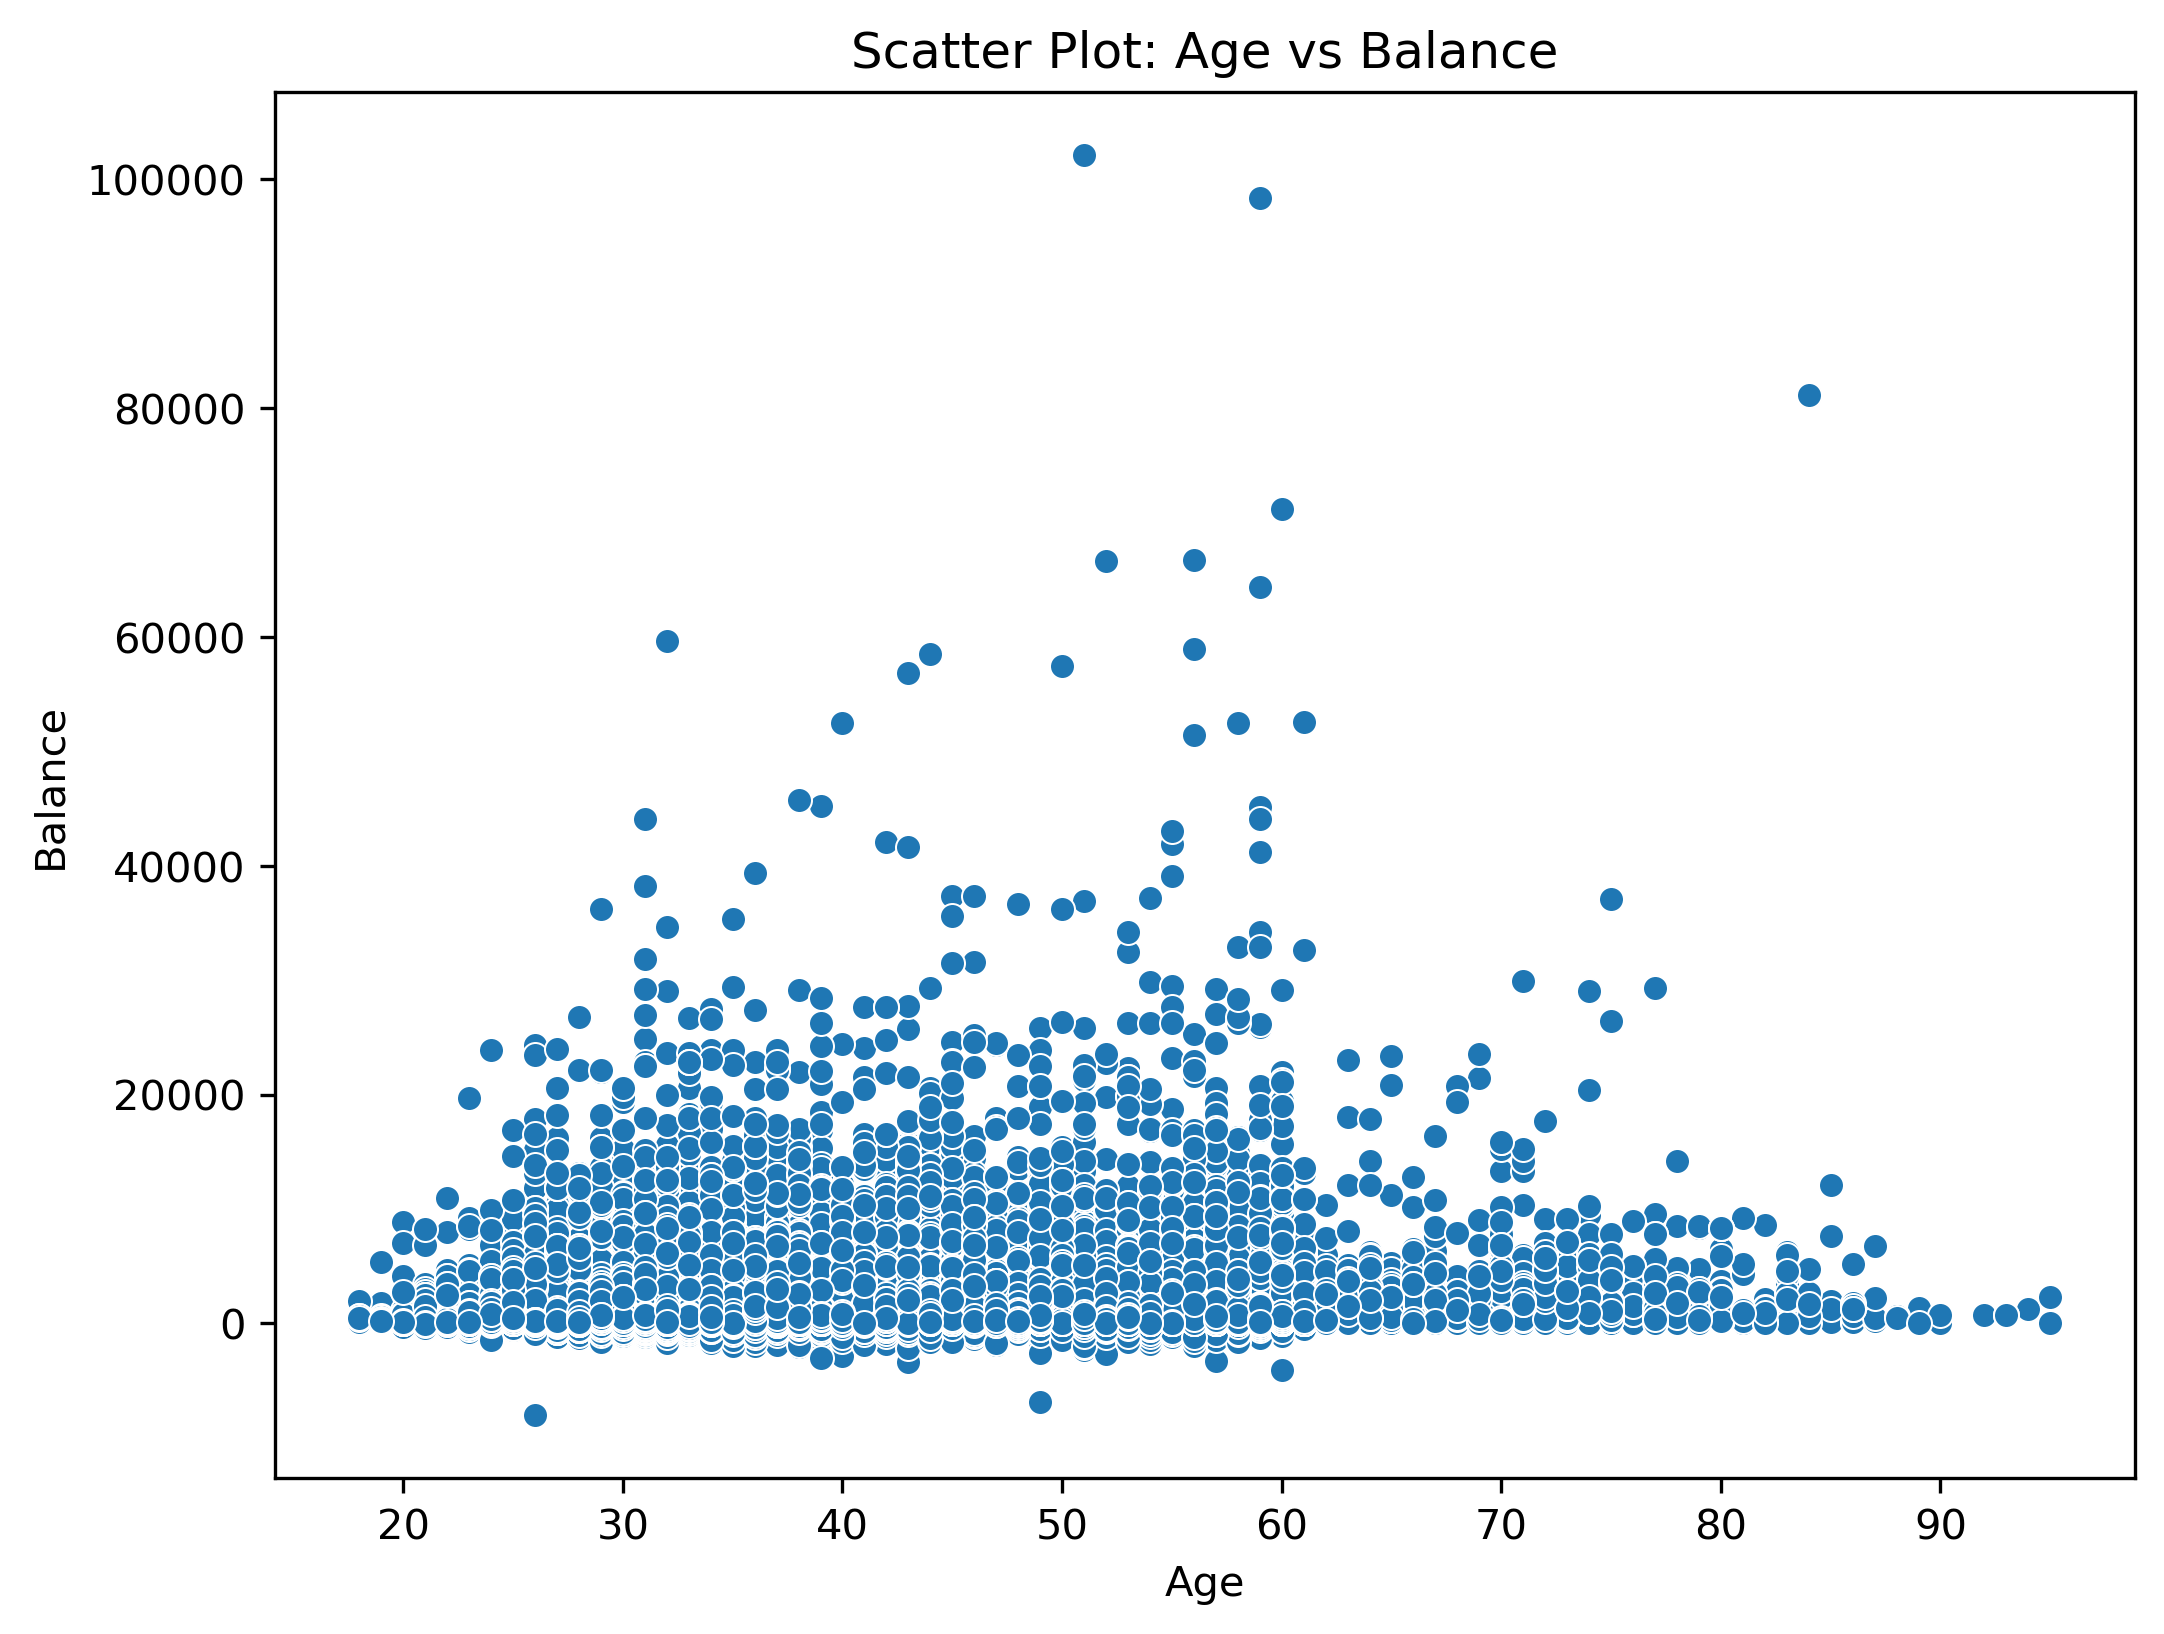

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='balance', data=df)
plt.title('Scatter Plot: Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

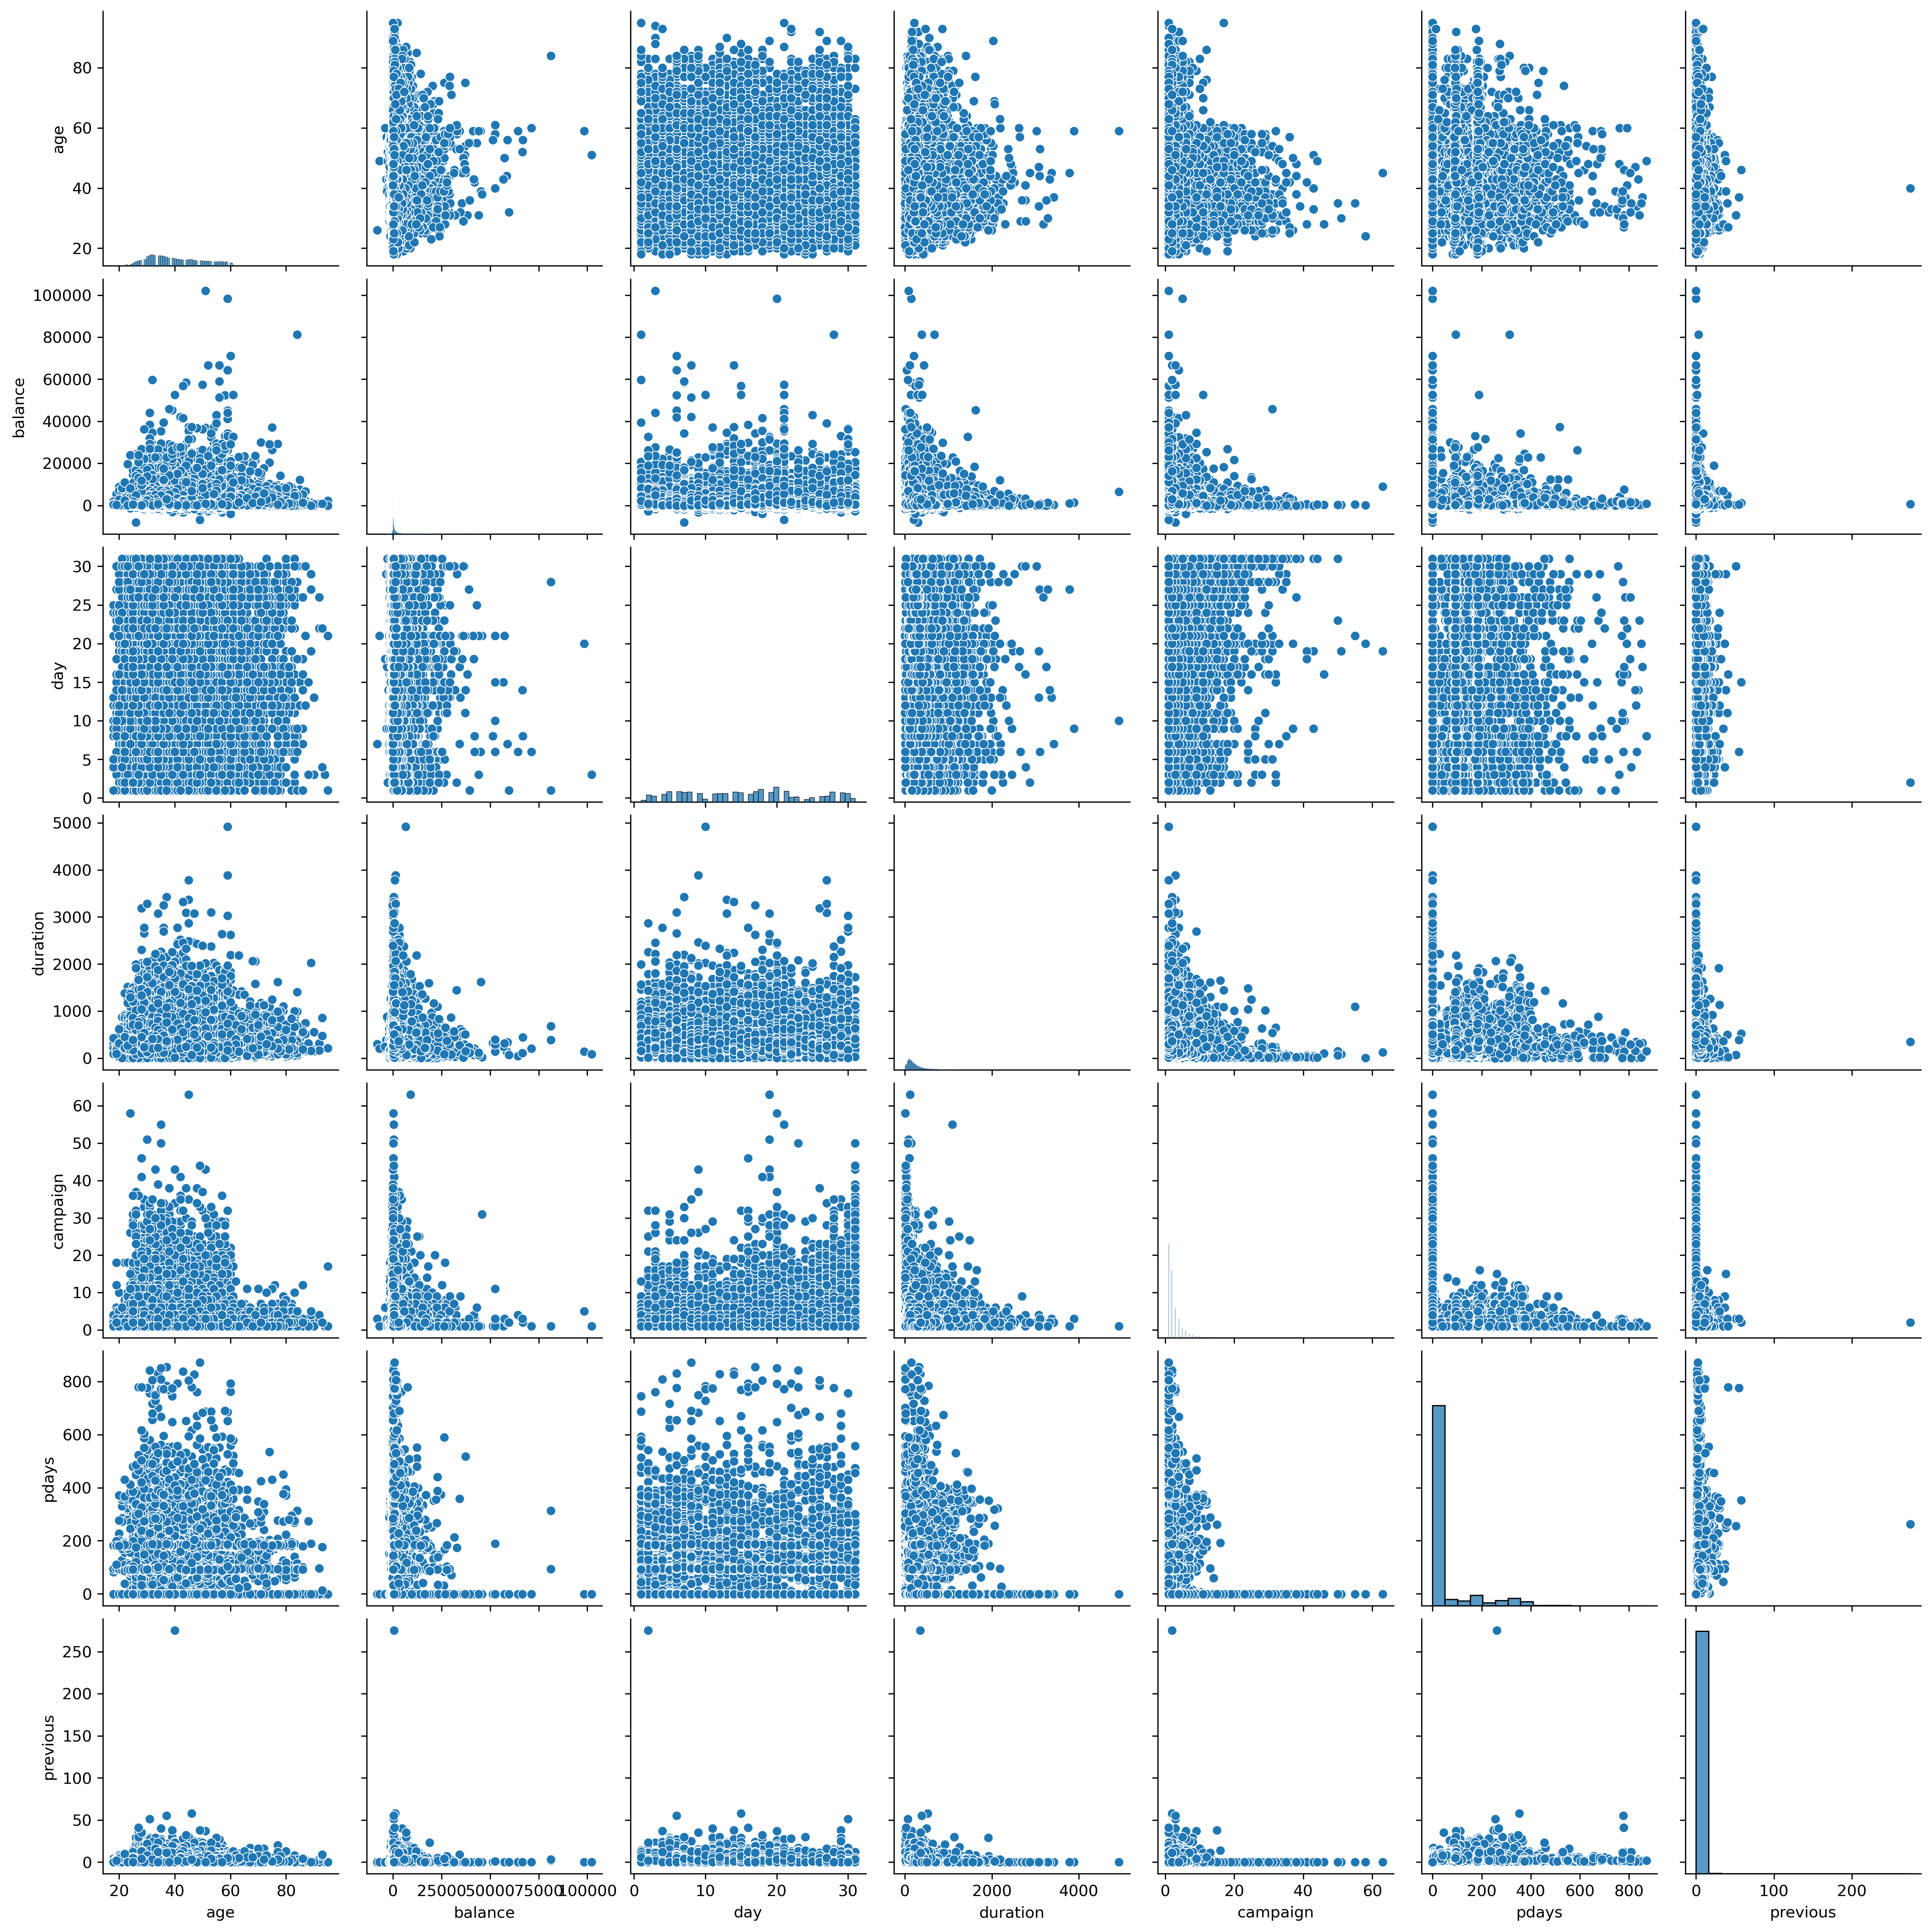

In [54]:
sns.pairplot(df)

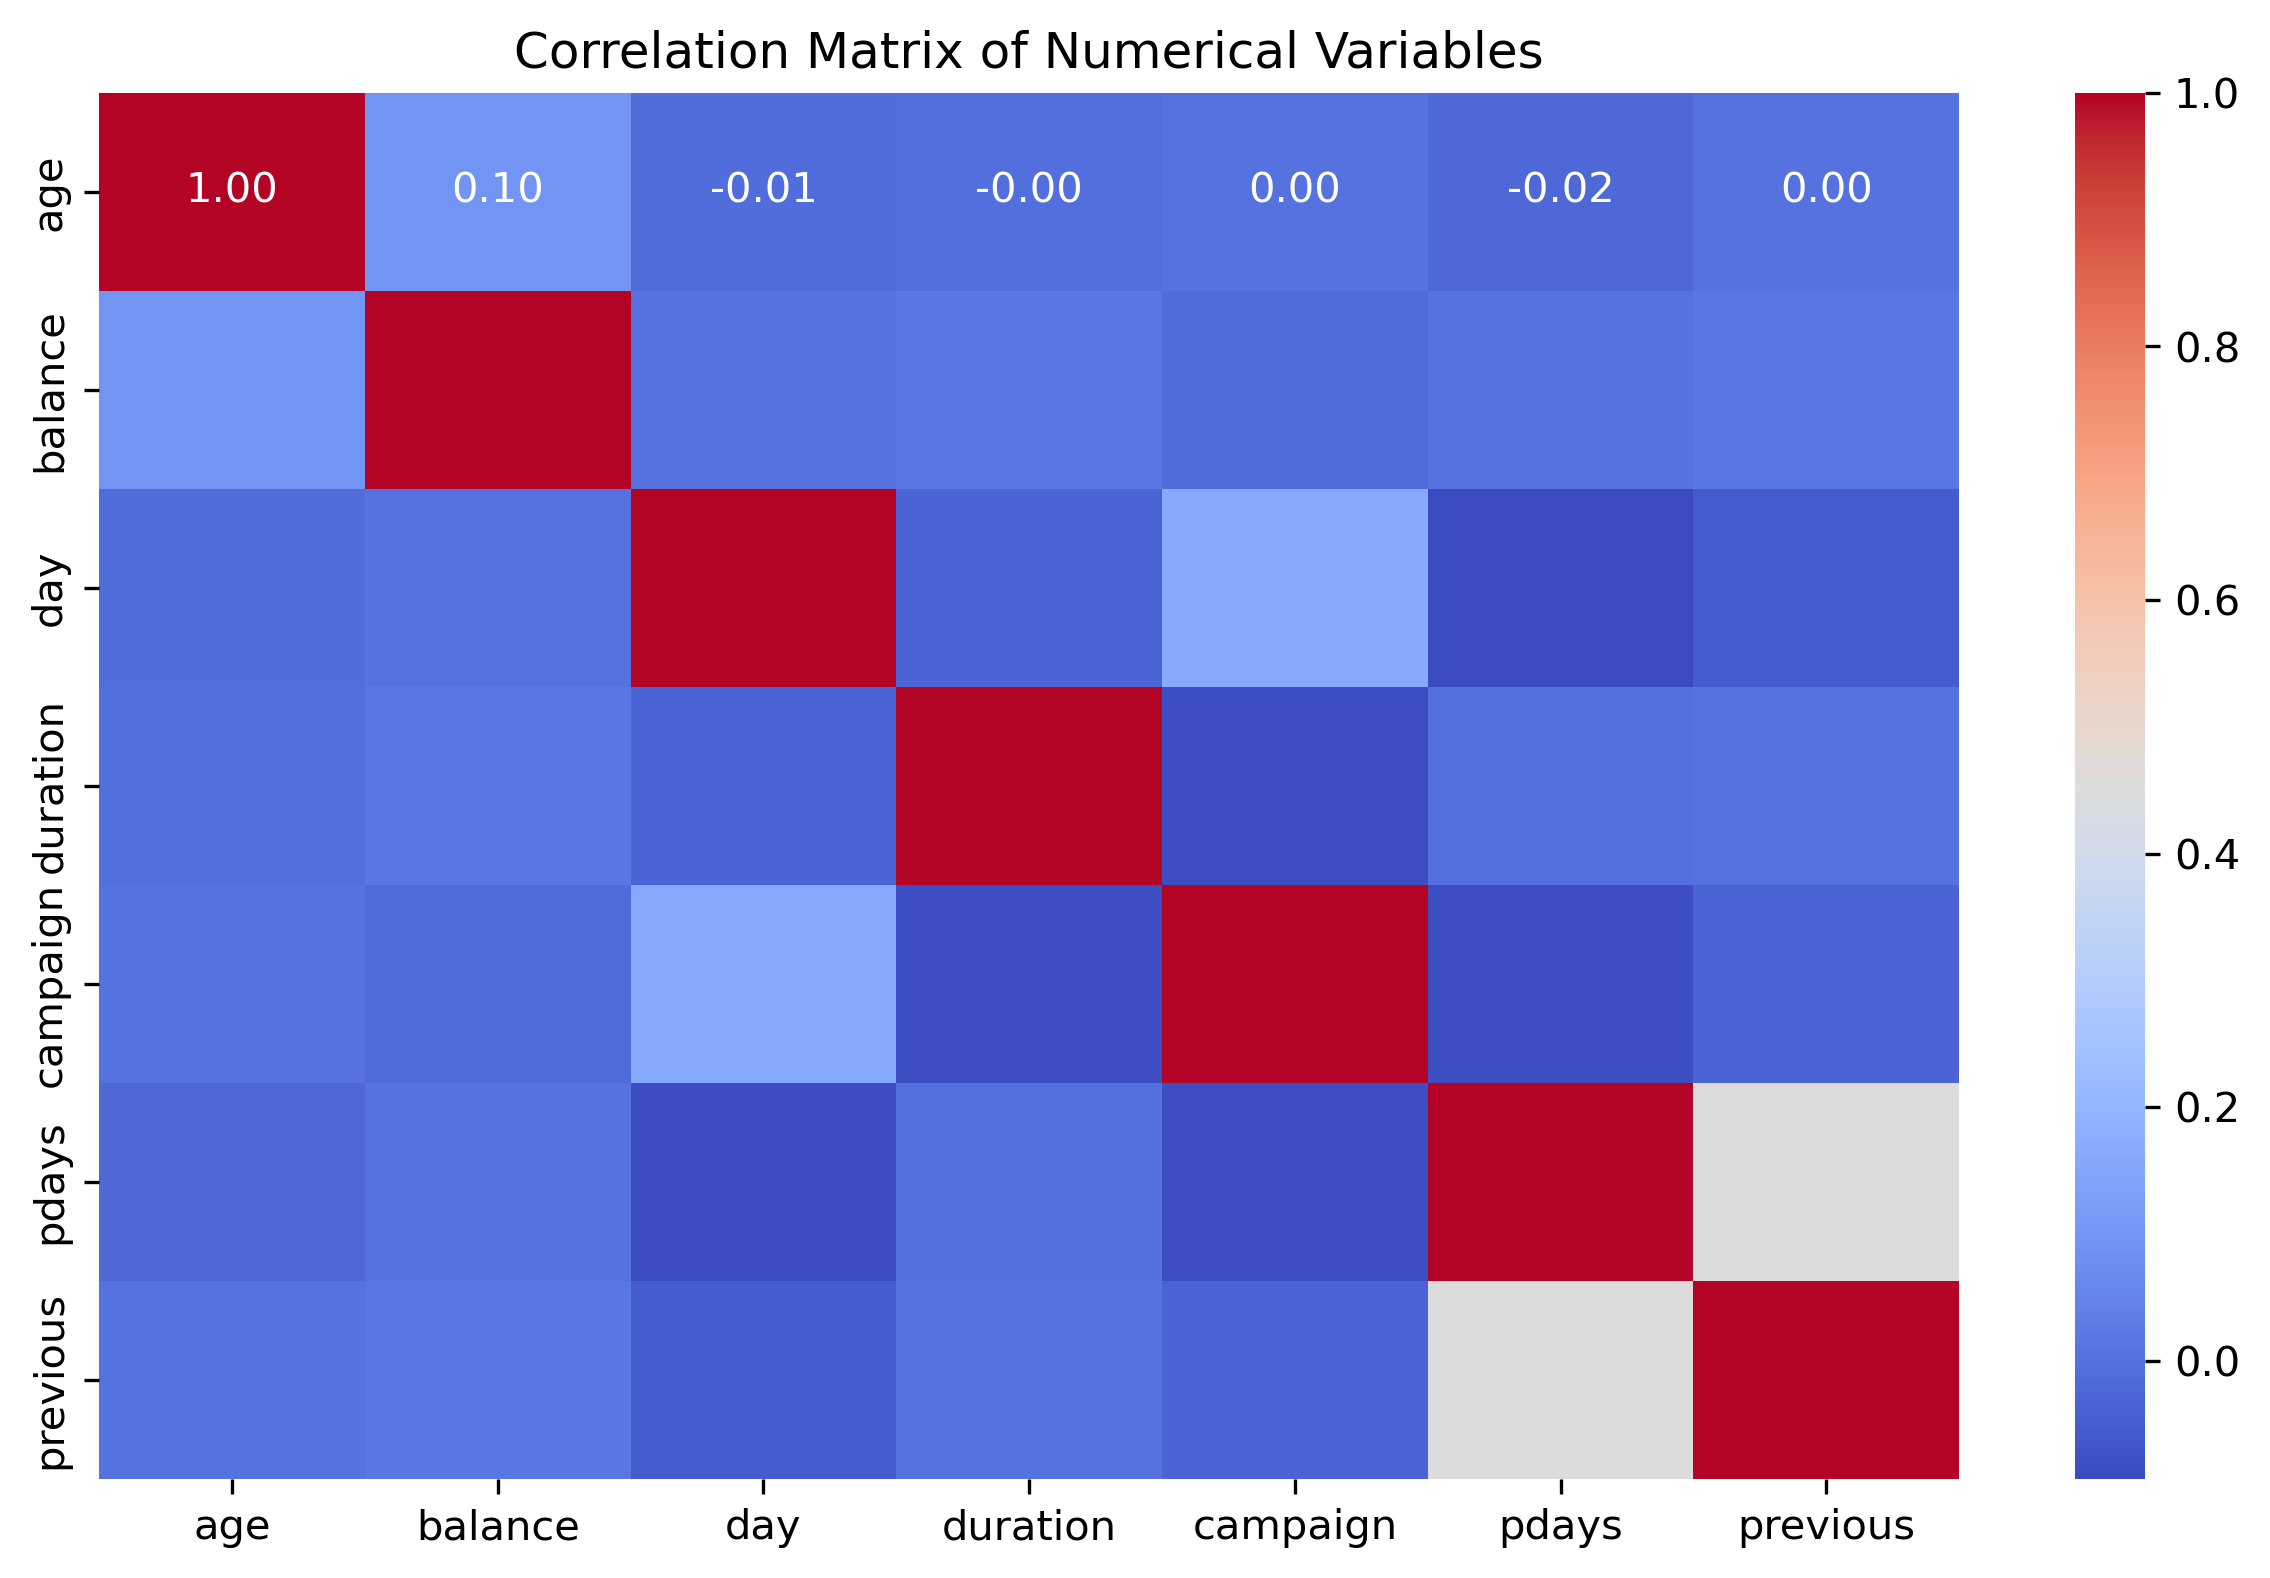

In [55]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

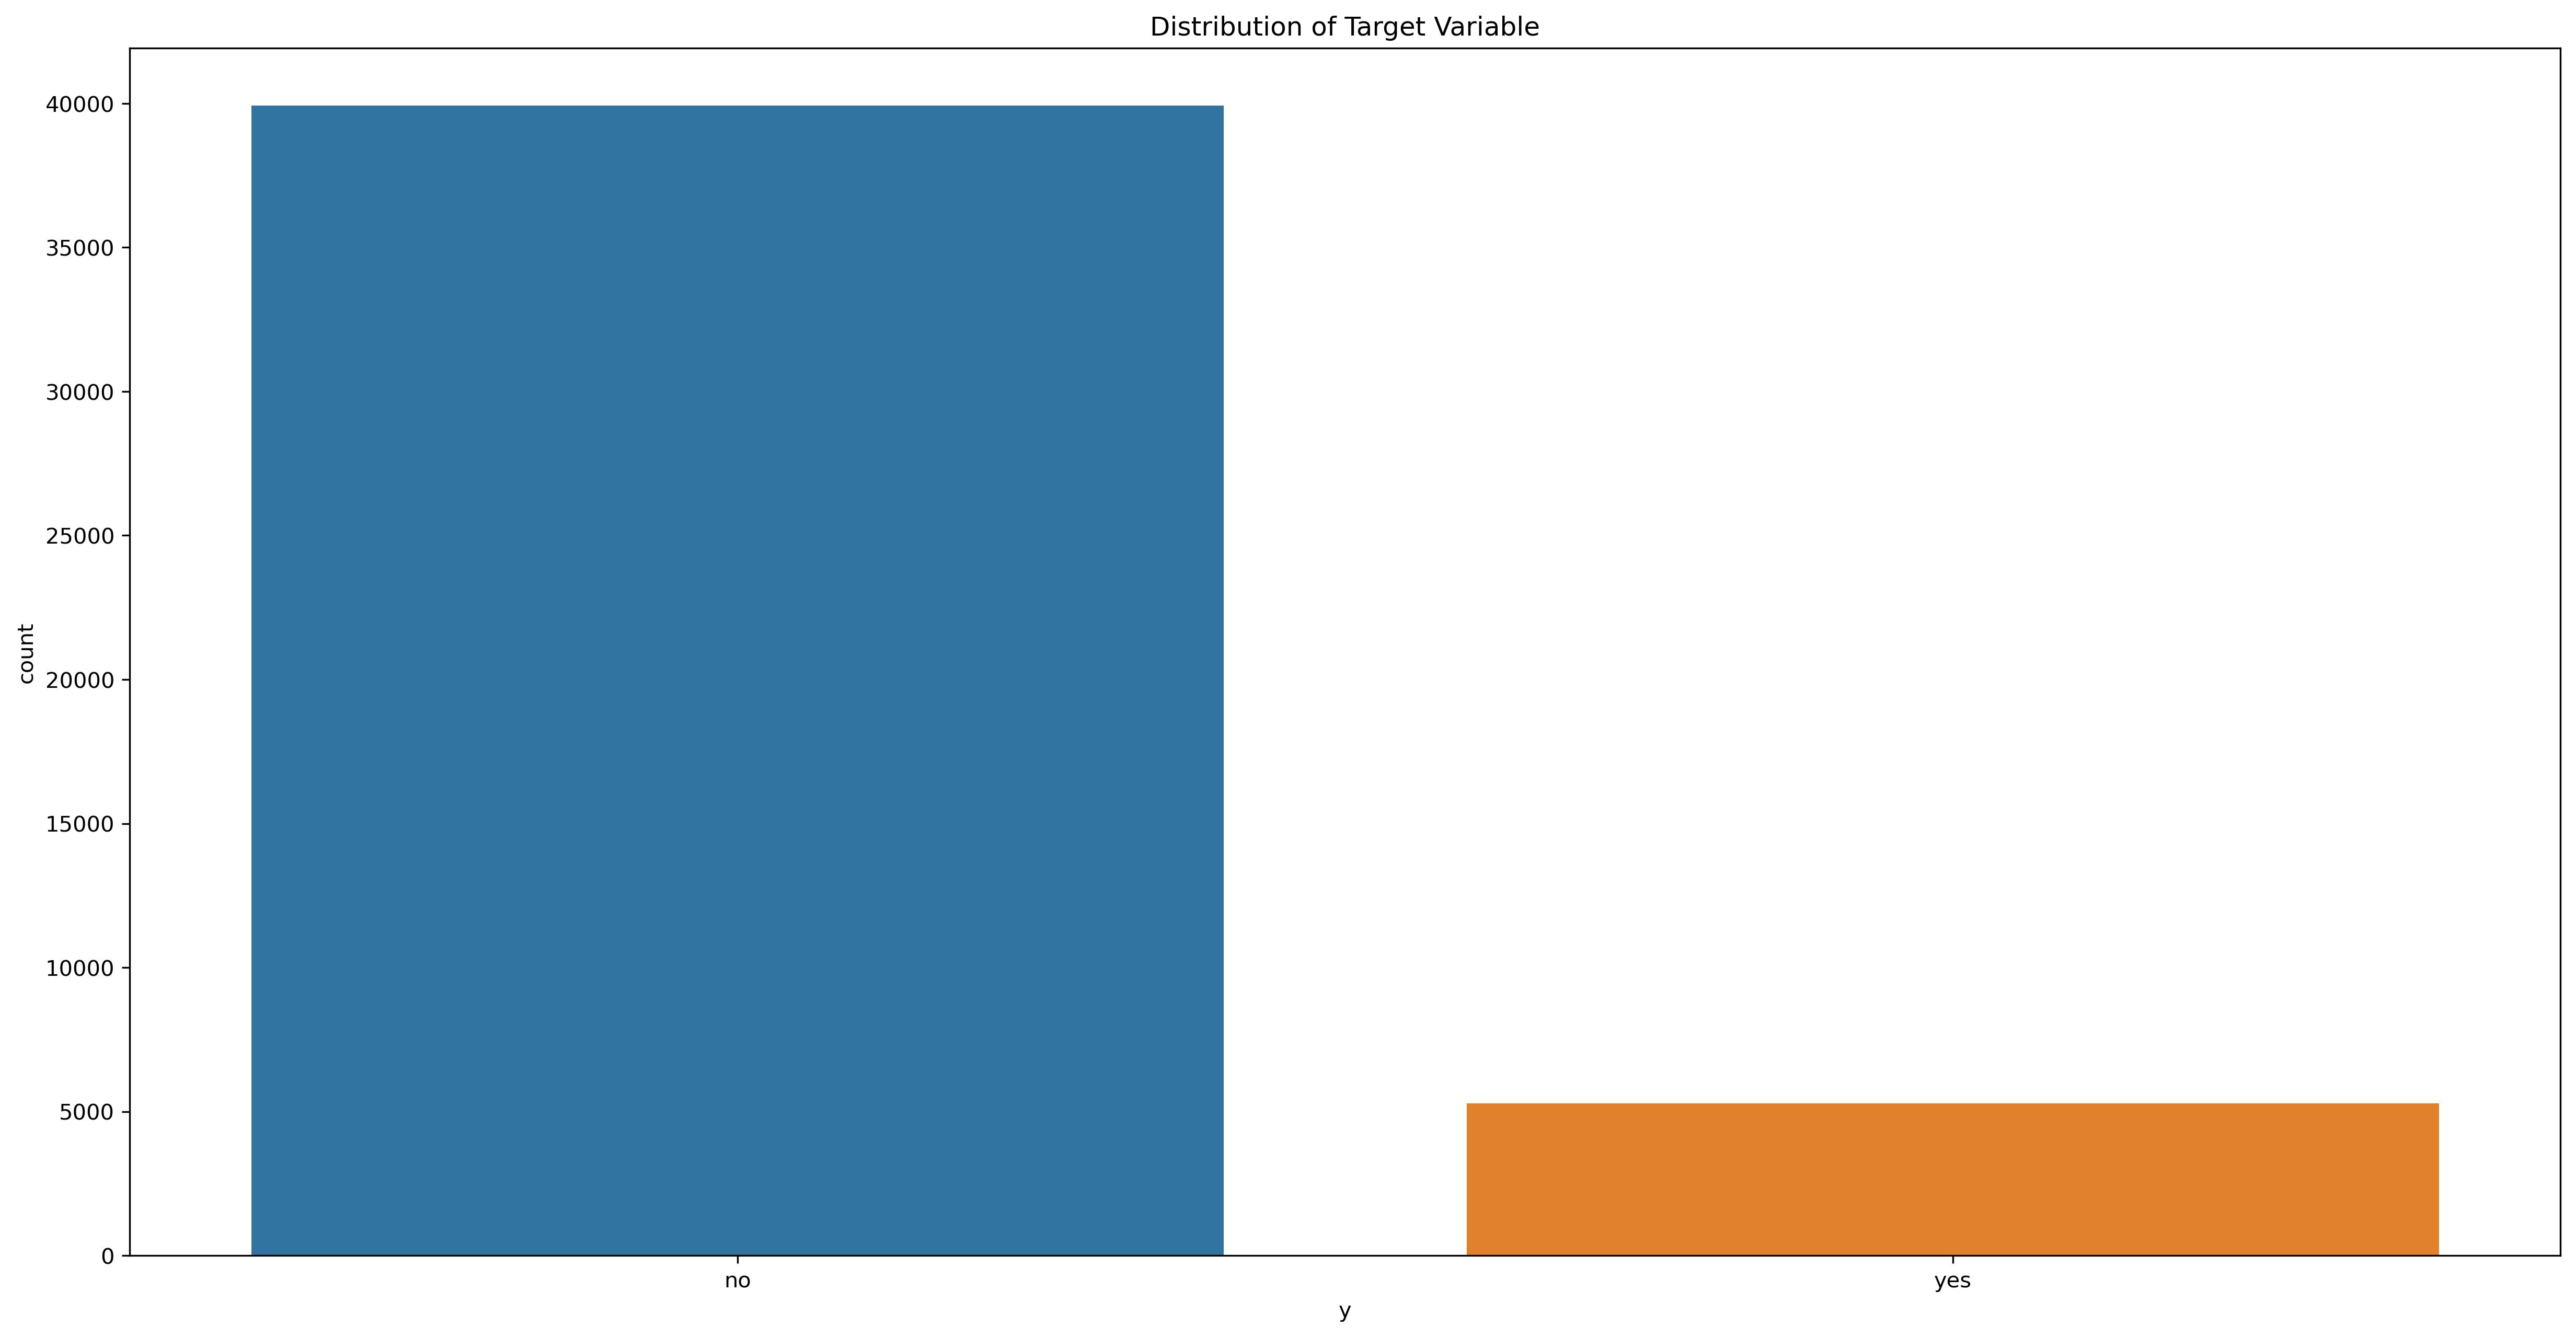

In [56]:
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable')
plt.show()


<Axes: >

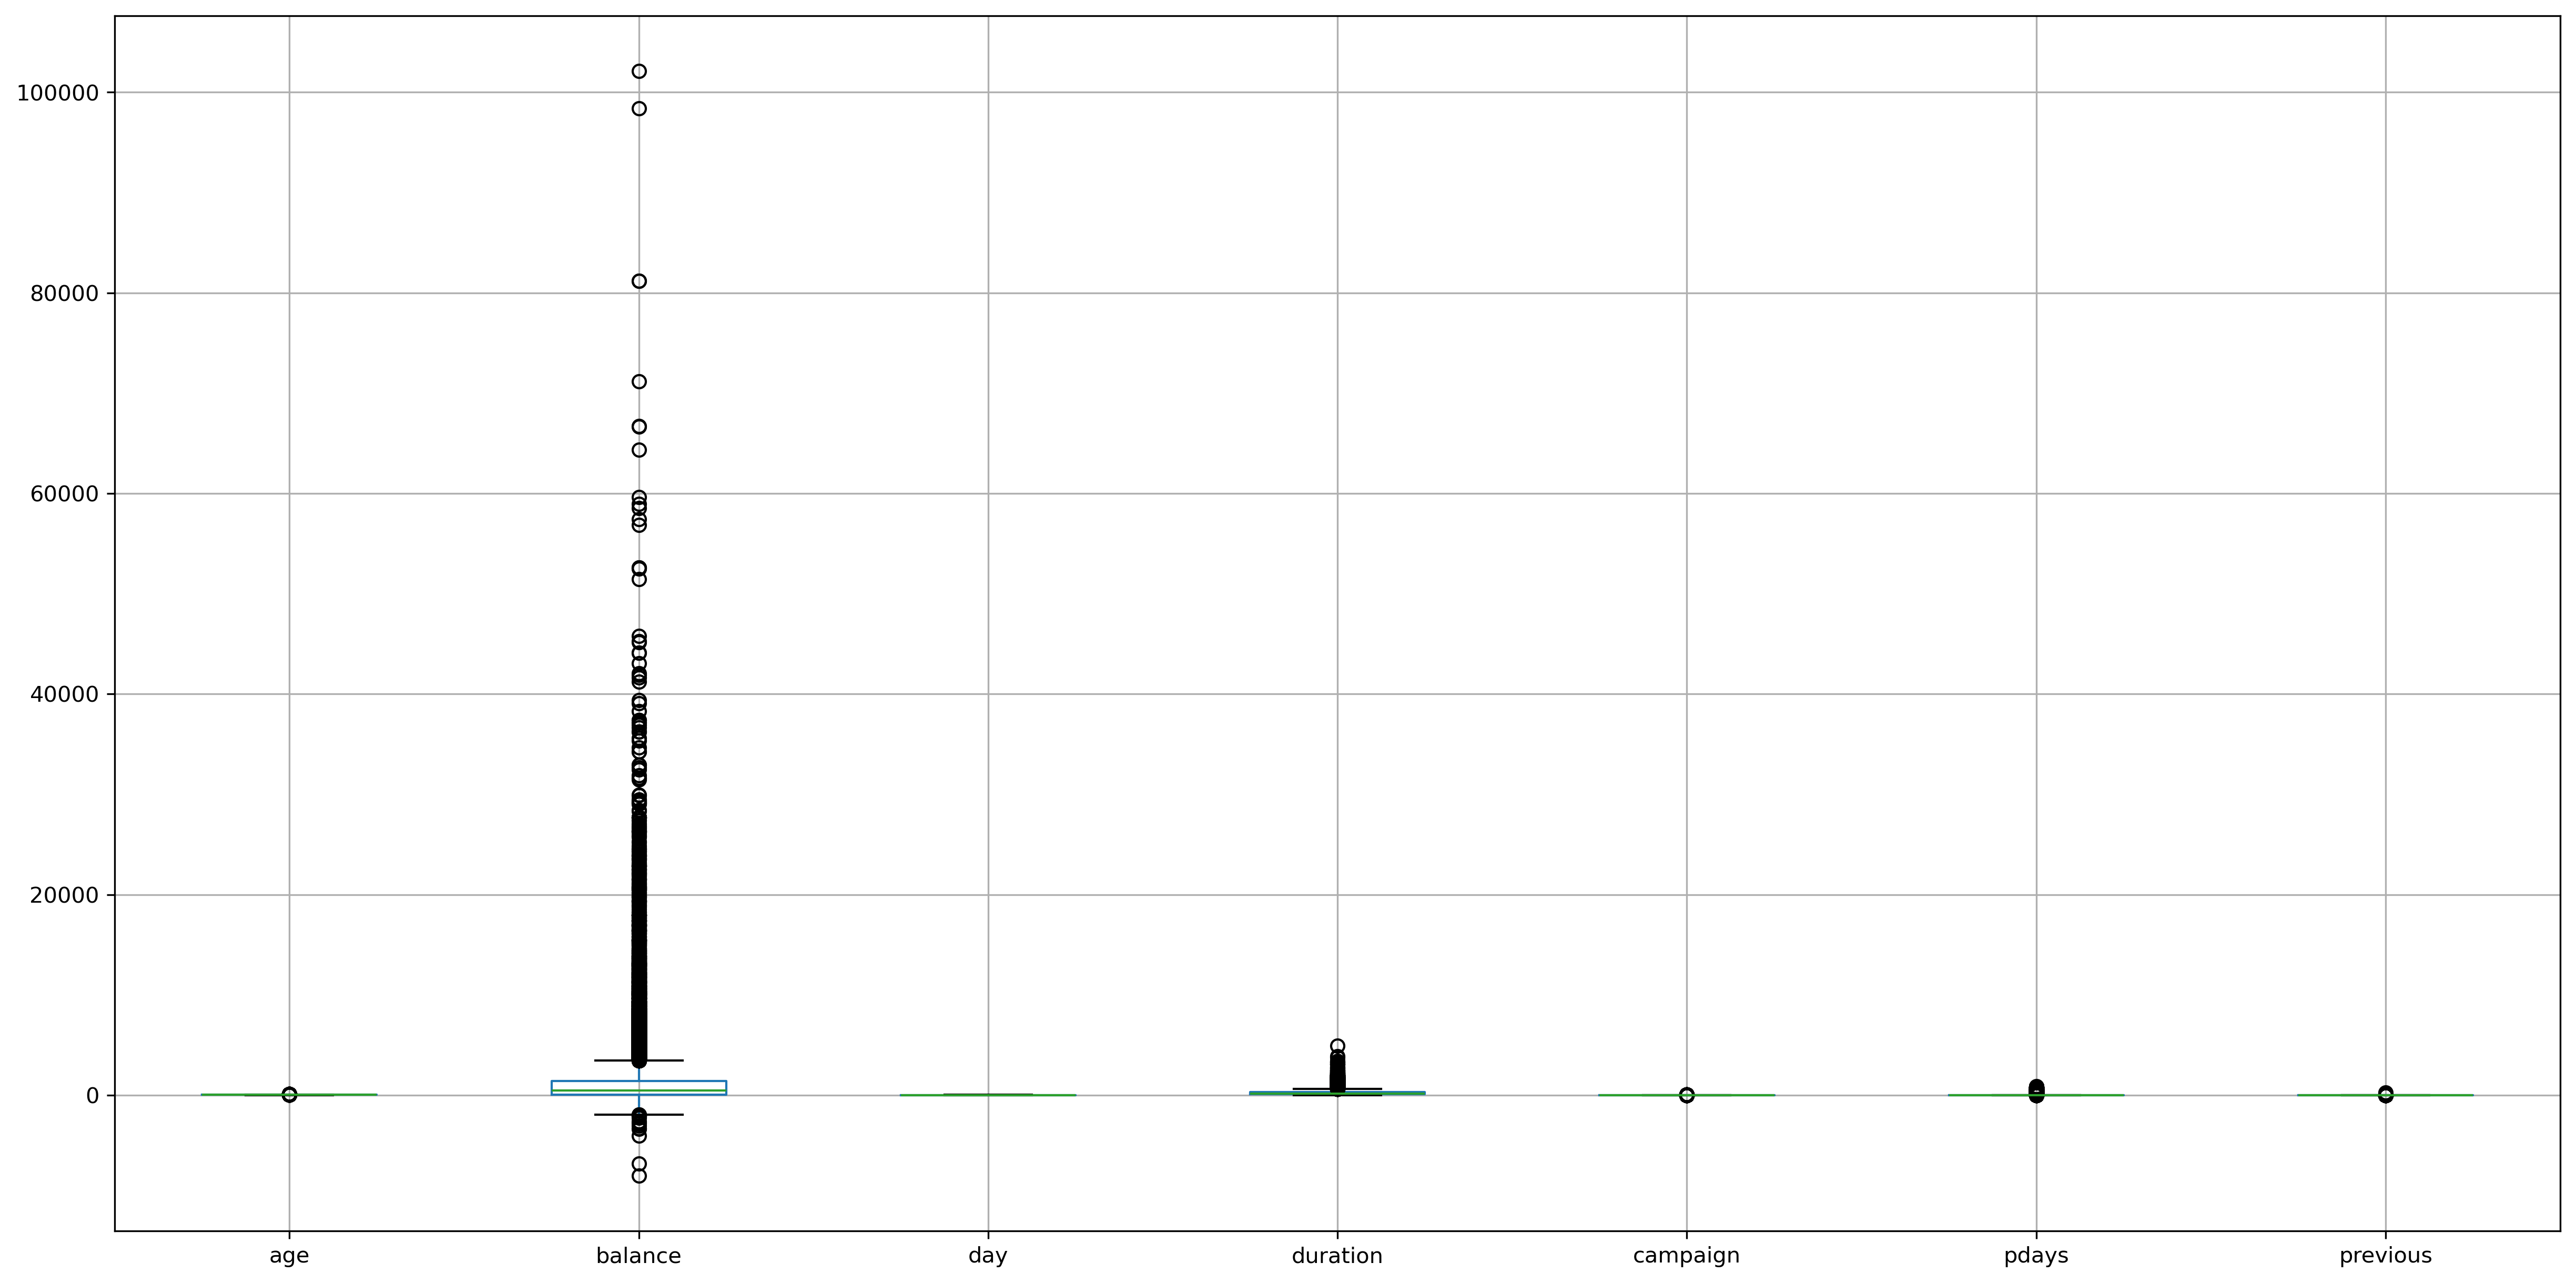

In [57]:
df.boxplot()

In [58]:
def outlier_replace(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

In [59]:
df = outlier_replace(df, 'age')
df = outlier_replace(df, 'balance')
df = outlier_replace(df, 'duration')
df = outlier_replace(df, 'campaign')
df = outlier_replace(df, 'pdays')
df = outlier_replace(df, 'previous')


<Axes: >

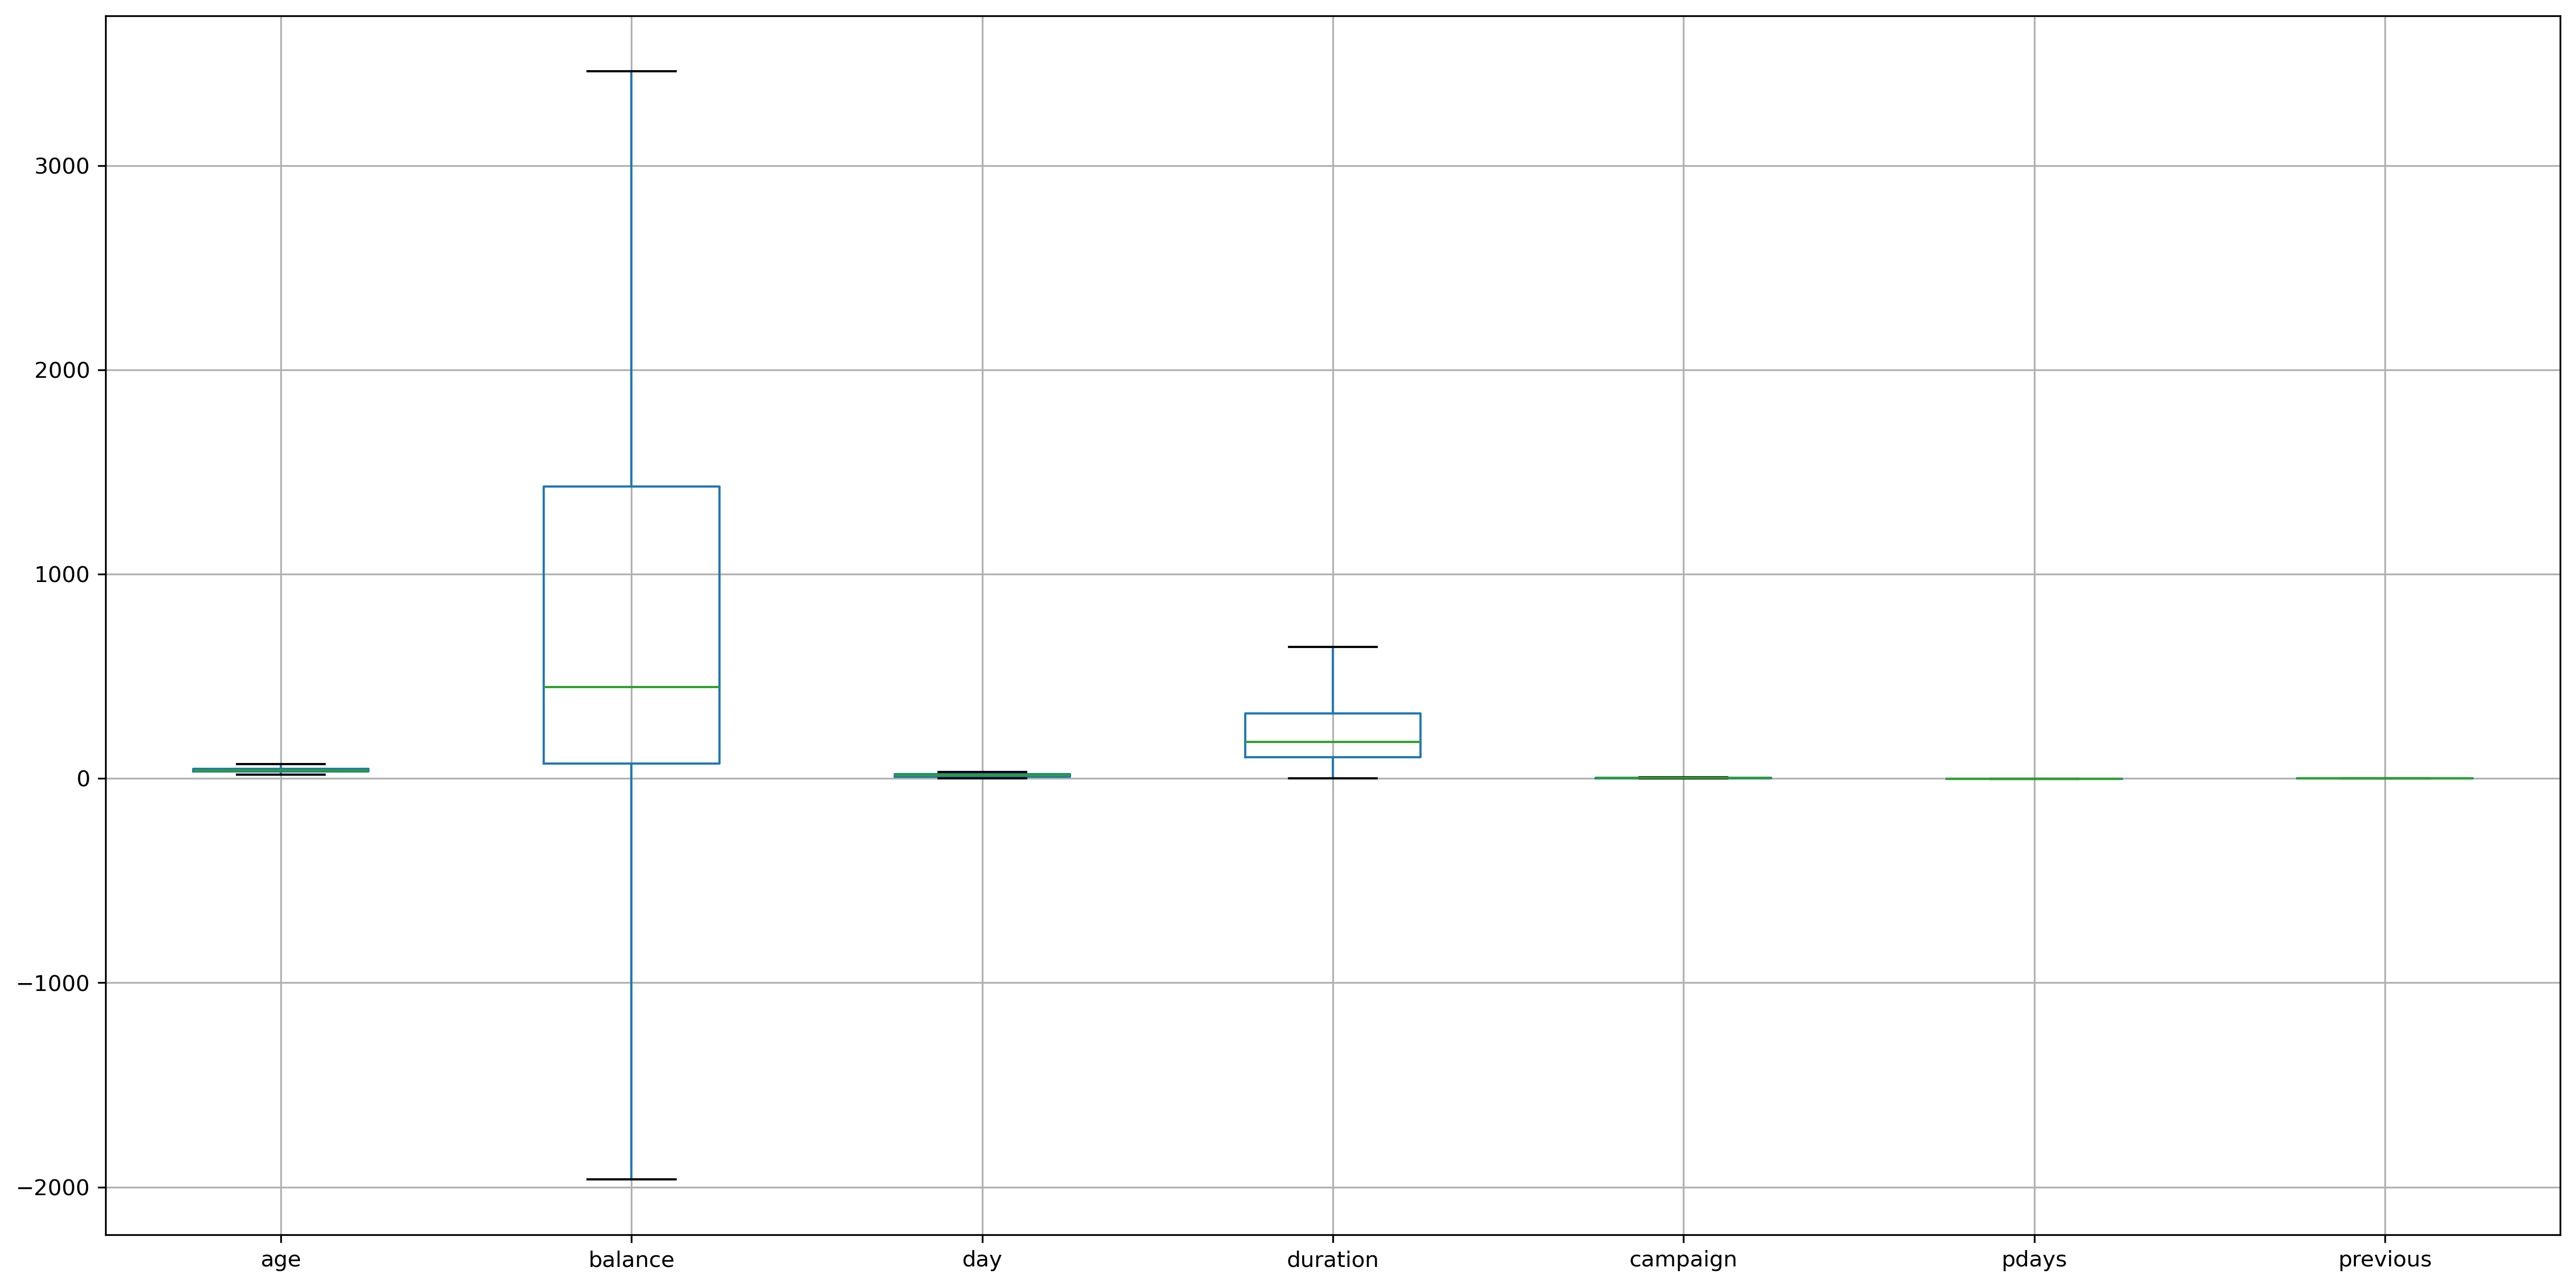

In [60]:
df.boxplot()

# Encoding

In [61]:
cat_cols = df.select_dtypes(object).columns
cat_cols 
df[cat_cols]

job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome    y  
0       may  unknown   no  
1       may  unknown   no  
2       may  unknown   no  
3       may  unknown   no  
4       may  unknown   no  
...     ...      ...  ...  
45206   nov  unknown  yes  
45207   nov  unknown  yes  
45208   nov  success  yes  
45209   nov  unknown   no  
45210   nov    other   no  

[45211 rows x 10 columns]

In [62]:
from sklearn.preprocessing import OrdinalEncoder
oe =  OrdinalEncoder()

In [63]:
df[cat_cols]=oe.fit_transform(df[cat_cols])


In [64]:
df

age   job  marital  education  default  balance  housing  loan  \
0      58.0   4.0      1.0        2.0      0.0   2143.0      1.0   0.0   
1      44.0   9.0      2.0        1.0      0.0     29.0      1.0   0.0   
2      33.0   2.0      1.0        1.0      0.0      2.0      1.0   1.0   
3      47.0   1.0      1.0        3.0      0.0   1506.0      1.0   0.0   
4      33.0  11.0      2.0        3.0      0.0      1.0      0.0   0.0   
...     ...   ...      ...        ...      ...      ...      ...   ...   
45206  51.0   9.0      1.0        2.0      0.0    825.0      0.0   0.0   
45207  70.5   5.0      0.0        0.0      0.0   1729.0      0.0   0.0   
45208  70.5   5.0      1.0        1.0      0.0   3462.0      0.0   0.0   
45209  57.0   1.0      1.0        1.0      0.0    668.0      0.0   0.0   
45210  37.0   2.0      1.0        1.0      0.0   2971.0      0.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome    y  
0          2.0    5    8.0     261.0       1.0   -1.0       0.0       3.0  0.0  
1          2.0    5    8.0     151.0       1.0   -1.0       0.0       3.0  0.0  
2          2.0    5    8.0      76.0       1.0   -1.0       0.0       3.0  0.0  
3          2.0    5    8.0      92.0       1.0   -1.0       0.0       3.0  0.0  
4          2.0    5    8.0     198.0       1.0   -1.0       0.0       3.0  0.0  
...        ...  ...    ...       ...       ...    ...       ...       ...  ...  
45206      0.0   17    9.0     643.0       3.0   -1.0       0.0       3.0  1.0  
45207      0.0   17    9.0     456.0       2.0   -1.0       0.0       3.0  1.0  
45208      0.0   17    9.0     643.0       5.0   -1.0       0.0       2.0  1.0  
45209      1.0   17    9.0     508.0       4.0   -1.0       0.0       3.0  0.0  
45210      0.0   17    9.0     361.0       2.0   -1.0       0.0       1.0  0.0  

[45211 rows x 17 columns]

In [65]:
X = df.iloc[:, :-1]
y = df['y']

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# model buliding

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [69]:
lg.fit(X_train, y_train)

LogisticRegression()

In [70]:
ypred = lg.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
confusion_matrix(y_test, ypred)

array([[7717,  235],
       [ 840,  251]], dtype=int64)

In [73]:
classification_report(y_test, ypred)

'              precision    recall  f1-score   support\n\n         0.0       0.90      0.97      0.93      7952\n         1.0       0.52      0.23      0.32      1091\n\n    accuracy                           0.88      9043\n   macro avg       0.71      0.60      0.63      9043\nweighted avg       0.86      0.88      0.86      9043\n'

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score


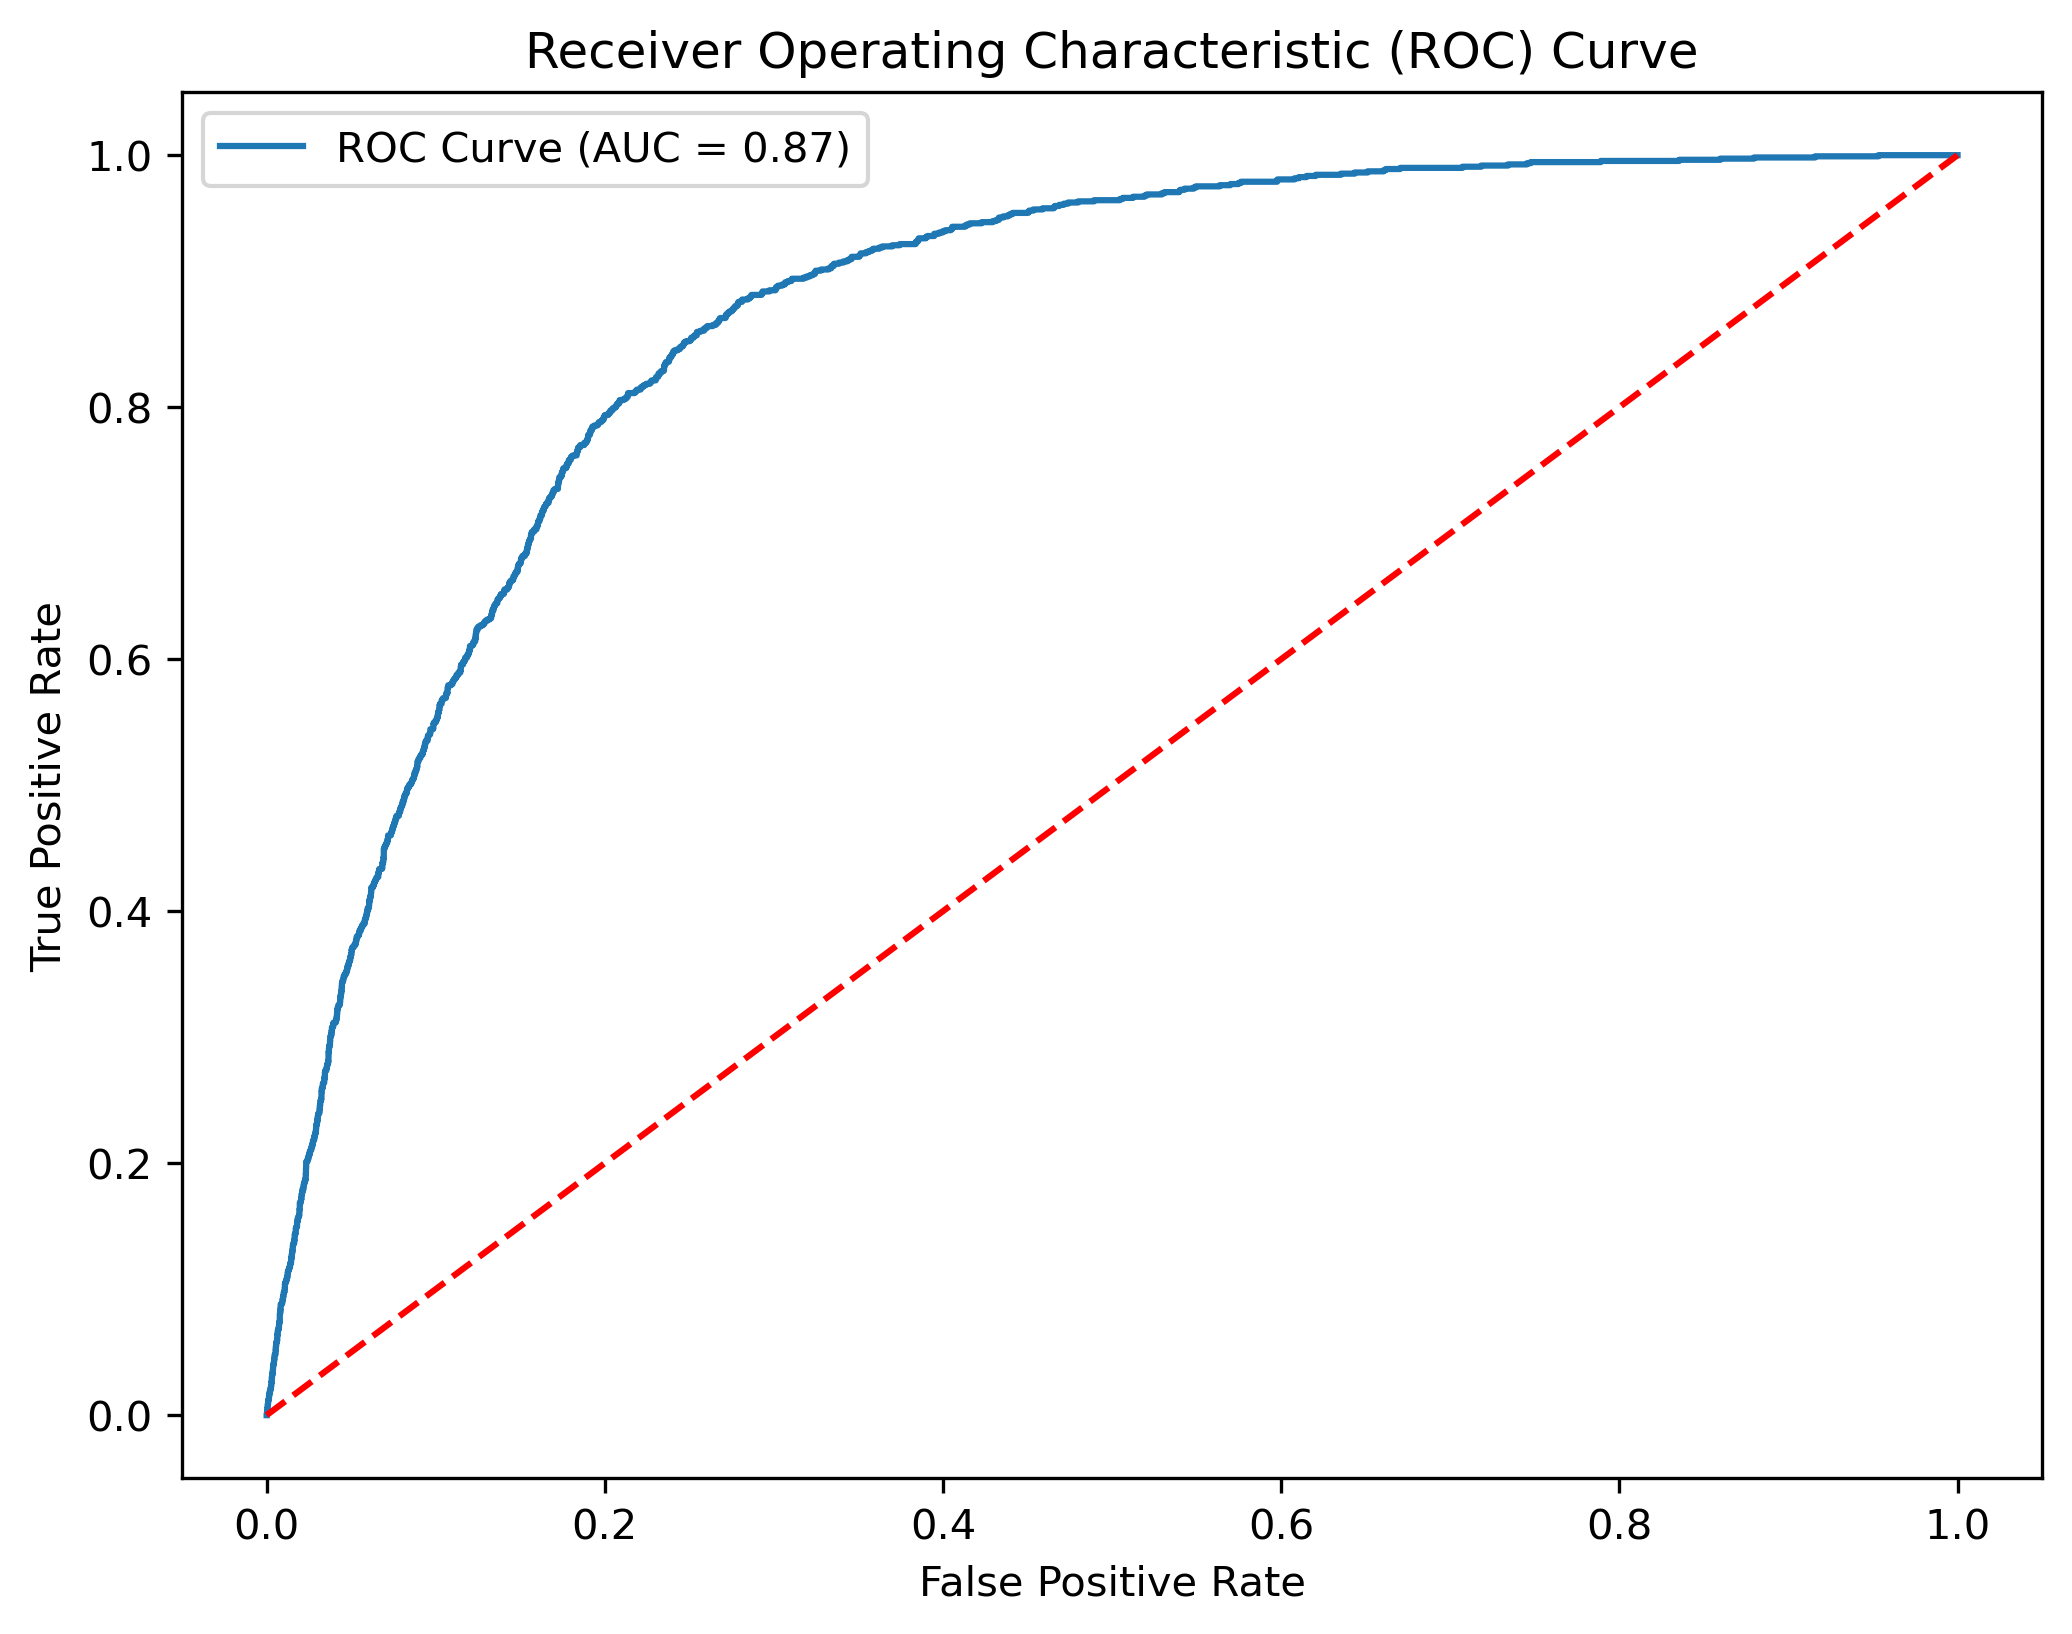

In [77]:
y_prob = lg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()